# Name- Bhanu Katoch

# Exp.- Specific Heat

# Statistical Mechanics 

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.integrate as sc
import pandas as pd

In [2]:
#constants
h = 6.623e-34
k = 1.38e-23
Na = 6.023e23
R = Na*k
n=1000
mx = 200
T = np.linspace(0,mx,n)

In [3]:
#trapezoidal----
def trape(f,a,b,n):
	hw = (b-a)/n
	sm = 0.0
	s1 = 0.5*(f(a) + f(b))
	for i in range(1,n):
		sm+=f(a+i*hw)
	return hw*(sm+s1)


In [4]:
#dulong------
dulong = 3*R

In [5]:
#einstein---
v = 1e12
th = (h*v)/k
def einstein(t):
	f1 = 3*R
	f2 = (th/t)**2
	f3 = np.exp(th/t)/(np.exp(th/t)-1)**2
	return f1*f2*f3



In [6]:
#debye-----
#vm = 1e12
thd = 88#(h*vm)/k
#print(thd)
def intf(x):
	return x**4*np.exp(x)/(np.exp(x)-1)**2
def debye(t):
	f_1 = 9*R*(t/thd)**3
	f_2 = trape(intf,0.01,thd/t,1000)
	#f_2 = sc.quad(intf,0.01,thd/t)[0]
	return f_1*f_2
d=[]
for i in T:
	d.append(debye(i))


/tmp/ipykernel_5460/3599854693.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  f_2 = trape(intf,0.01,thd/t,1000)
/tmp/ipykernel_5460/3599854693.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2
/tmp/ipykernel_5460/3599854693.py:6: RuntimeWarning: overflow encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2


/tmp/ipykernel_5460/181869670.py:6: RuntimeWarning: divide by zero encountered in divide
  f2 = (th/t)**2
/tmp/ipykernel_5460/181869670.py:7: RuntimeWarning: divide by zero encountered in divide
  f3 = np.exp(th/t)/(np.exp(th/t)-1)**2
/tmp/ipykernel_5460/181869670.py:7: RuntimeWarning: invalid value encountered in divide
  f3 = np.exp(th/t)/(np.exp(th/t)-1)**2


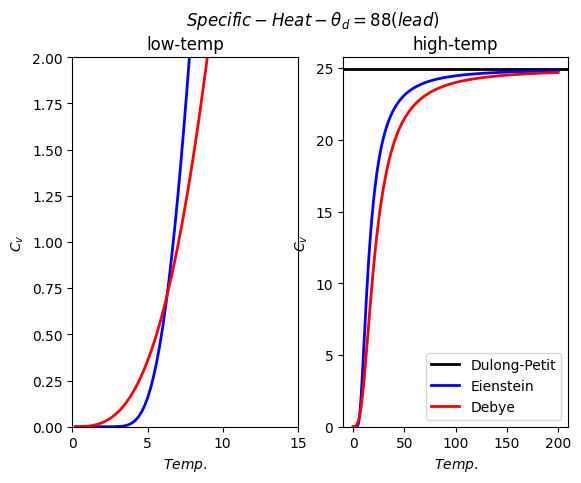

In [7]:
#plot
plt.subplot(1,2,1)
plt.axhline(y=dulong,lw=2,c='k',label='Dulong-Petit')
plt.plot(T,einstein(T),lw=2,c='b',label='Eienstein')
plt.plot(T,d,lw=2,c='r',label='Debye')
plt.ylabel(r'$C_v$')
plt.xlabel('$Temp.$')
plt.title('low-temp')
#print(debye(100))
plt.ylim(0,2)
plt.xlim(0,15)
plt.subplot(1,2,2)
plt.ylabel(r'$C_v$')
plt.xlabel('$Temp.$')
plt.axhline(y=dulong,lw=2,c='k',label='Dulong-Petit')
plt.plot(T,einstein(T),lw=2,c='b',label='Eienstein')
plt.plot(T,d,lw=2,c='r',label='Debye')
plt.title('high-temp')
#print(debye(100))
plt.ylim(0,3.1*R)
plt.legend(loc='best')
plt.suptitle(r"$Specific-Heat- \theta_d=88 (lead)$")
plt.show()
